### Praca Domowa - ML

Zadanie nr 1 25pkt.

Na podstawie danych zawartych w zbiorze https://www.kaggle.com/uciml/pima-indians-diabetes-database

Przygotuj:

A. Przegląd danych w zbiorze

head
info
shape
describe
value_counts

B. Udział poszczególnych kategorii

Pudełko
Histogram
C. Braki danych w zbiorze

D. Korelacja

E. Feature Engineering

Stworzenie zmiennych 0-1 dla zmiennych kategorycznych
Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych 0-1

F. Przygotowanie zbioru do modelowania

Podział zbioru na treningowy i testowy
Analiza głównych składowych

E. Model klasyfikacyjny

Użyj wybranego modelu klasyfikacyjnego znanego Ci z zajęć. Wyestymuj dwa modele - jeden na wystandaryzowanych danych, a drugi na PCA.

F. Ocena modelu klasyfikacyjnego

Wyznacz accuracy, precision, lub inne miary znane Ci z zajęć, które uznasz za stosowne. Porównaj wyniki dla obydwu modeli na odpowiednich zbiorach (Dane wystandaryzowane, dane PCA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, silhouette_score

In [109]:
#Przegląd danych w zbiorze
df = pd.read_csv('diabetes.csv')

In [110]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [113]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [114]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

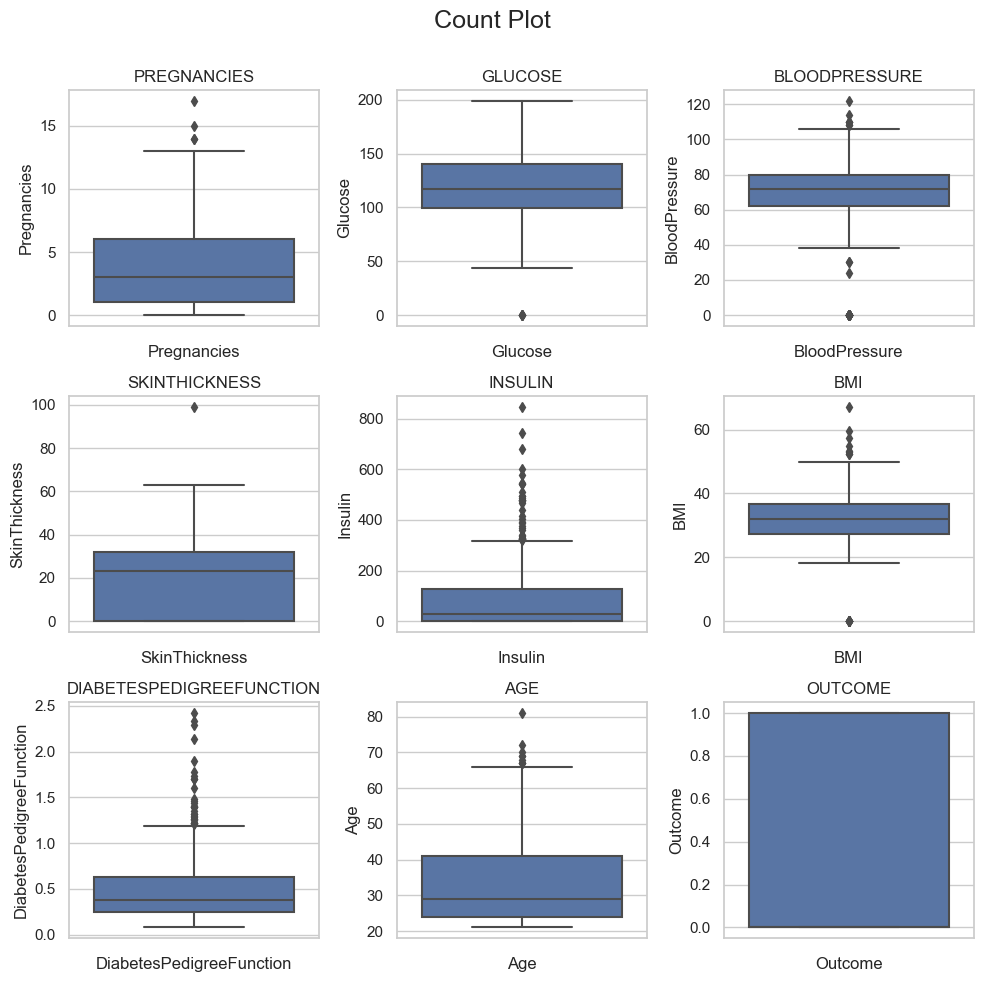

In [136]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
for i, col in enumerate(df.columns):
    ax = plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=col, ax=ax)
    plt.suptitle('Count Plot', size=18)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.title(f'{col.upper()}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
plt.show()
   

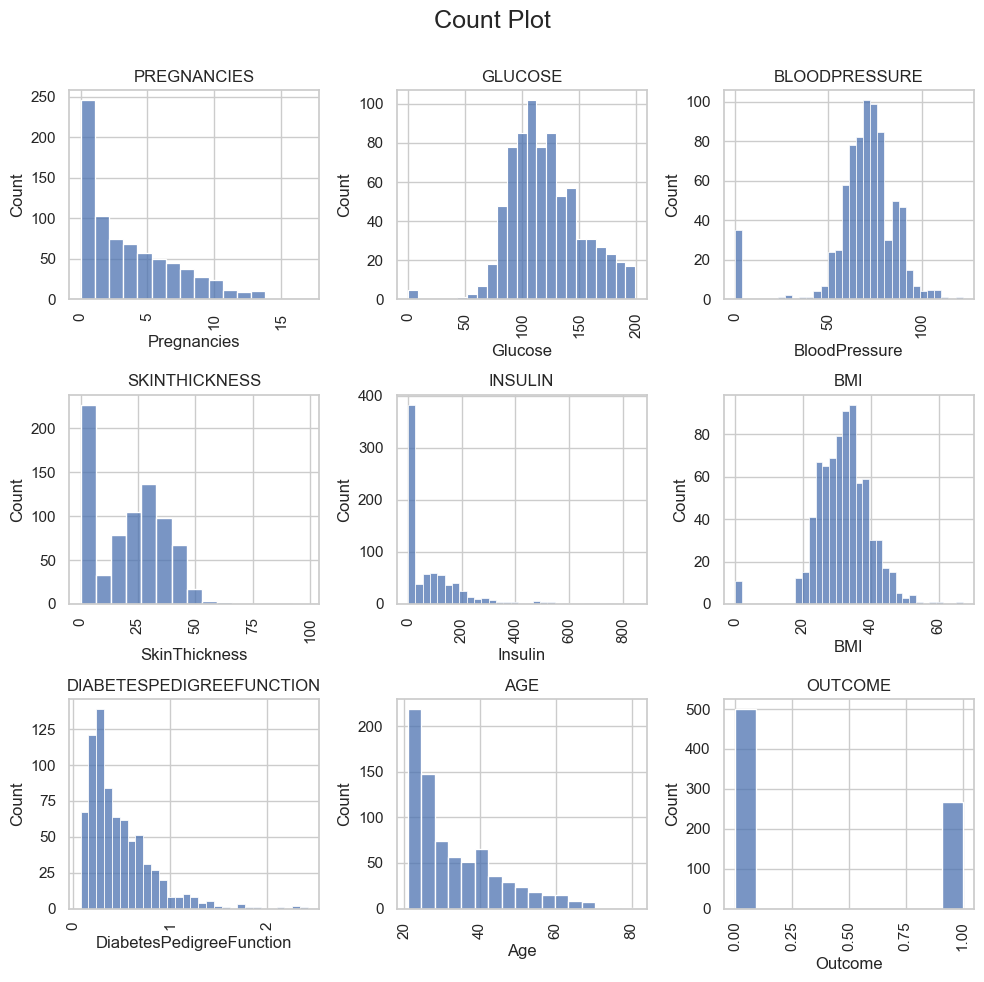

In [137]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
for i, col in enumerate(df.columns):
    ax = plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, ax=ax)
    plt.suptitle('Count Plot', size=18)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.title(f'{col.upper()}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
plt.show()

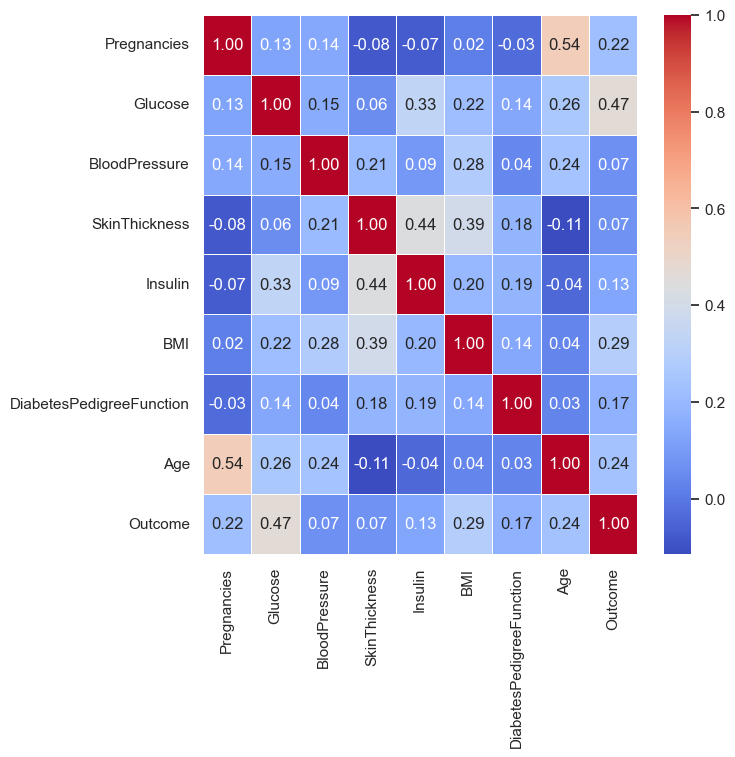

In [138]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [123]:
# Wybór cech na podstawie korelacji
df_features = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]
df_features

Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age
0              6      148        0  33.6                     0.627   50
1              1       85        0  26.6                     0.351   31
2              8      183        0  23.3                     0.672   32
3              1       89       94  28.1                     0.167   21
4              0      137      168  43.1                     2.288   33
..           ...      ...      ...   ...                       ...  ...
763           10      101      180  32.9                     0.171   63
764            2      122        0  36.8                     0.340   27
765            5      121      112  26.2                     0.245   30
766            1      126        0  30.1                     0.349   47
767            1       93        0  30.4                     0.315   23

[768 rows x 6 columns]

In [125]:
# Skalowanie cech 
standardscaler = StandardScaler()
standardscaler.fit_transform(df_features)

array([[ 0.63994726,  0.84832379, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-0.84488505, -1.12339636, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.23388019,  1.94372388, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [-0.84488505,  0.1597866 , -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.84488505, -0.8730192 , -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

In [126]:
# Ramka cech po skalowaniu
diabetes_std = pd.DataFrame(standardscaler.fit_transform(df_features), columns=df_features.columns)
diabetes_std

Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction  \
0       0.639947  0.848324 -0.692891  0.204013                  0.468492   
1      -0.844885 -1.123396 -0.692891 -0.684422                 -0.365061   
2       1.233880  1.943724 -0.692891 -1.103255                  0.604397   
3      -0.844885 -0.998208  0.123302 -0.494043                 -0.920763   
4      -1.141852  0.504055  0.765836  1.409746                  5.484909   
..           ...       ...       ...       ...                       ...   
763     1.827813 -0.622642  0.870031  0.115169                 -0.908682   
764    -0.547919  0.034598 -0.692891  0.610154                 -0.398282   
765     0.342981  0.003301  0.279594 -0.735190                 -0.685193   
766    -0.844885  0.159787 -0.692891 -0.240205                 -0.371101   
767    -0.844885 -0.873019 -0.692891 -0.202129                 -0.473785   

          Age  
0    1.425995  
1   -0.190672  
2   -0.105584  
3   -1.041549  
4   -0.020496  
..        ...  
763  2.532136  
764 -0.531023  
765 -0.275760  
766  1.170732  
767 -0.871374  

[768 rows x 6 columns]

In [147]:
# Dzielenie danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(diabetes_std, df['Outcome'], test_size=0.3, random_state=42)

In [148]:
rf_class = RandomForestClassifier(n_estimators=5, max_depth=6,random_state=42)
rf_class.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=5, random_state=42)

In [149]:
# Features importances
imp = pd.DataFrame(rf_class.feature_importances_, rf_class.feature_names_in_,
                                   columns=['importance']).sort_values('importance', ascending=False)
imp


importance
Glucose                     0.315252
Age                         0.207694
BMI                         0.197936
DiabetesPedigreeFunction    0.125212
Pregnancies                 0.078211
Insulin                     0.075695

In [150]:
# Accuracy na danych treningowych
y_pred_train=rf_class.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.8603351955307262

In [151]:
# Accuracy na danych testowych
y_pred_test=rf_class.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7705627705627706

In [153]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.68      0.65      0.66        80

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



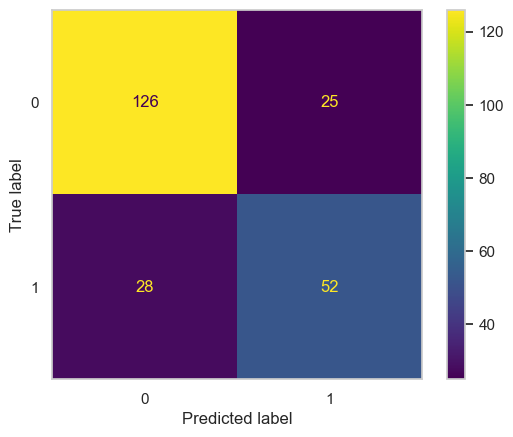

In [149]:
# Macierz błędów na danych wystandaryzowanych
cm = confusion_matrix(y_test, y_pred_test, labels=rf_class.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_class.classes_)
disp.plot()
plt.grid(False)
plt.show()

### Analiza składowych głównych

In [155]:
# Przekszatałcenie danych do dwóch nowych komponentów
pca = PCA(n_components=2)
diabetes_pca = pca.fit_transform(diabetes_std)
print('Kształt oryrginalny: {}'.format(str(diabetes_std.shape)))
print('Kształt zredukowany: {}'.format(str(diabetes_pca.shape)))

Kształt oryrginalny: (768, 6)
Kształt zredukowany: (768, 2)


In [156]:
# Dopasowanie PCA do danych i transformacja danych
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

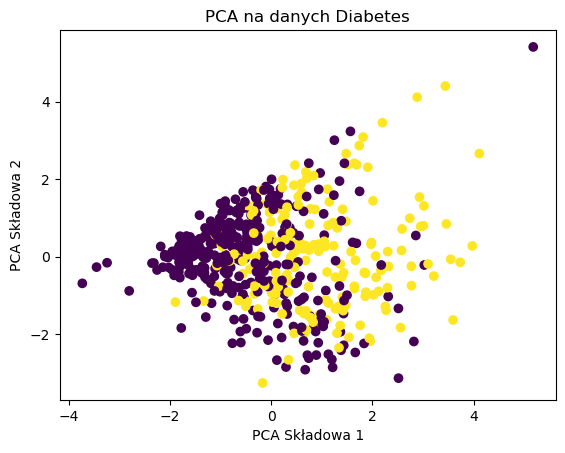

In [158]:
# Jak PCA pomoga w separacji klas
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PCA Składowa 1')
plt.ylabel('PCA Składowa 2')
plt.title('PCA na danych Diabetes')
plt.show()

In [165]:
# Trenowanie modelu lasów losowch po redukcji wymiarowości
rf_class = RandomForestClassifier(n_estimators=5, max_depth=6,random_state=42)
rf_class = rf_class.fit(X_train_pca, y_train)

In [166]:
# Accuracy na danych treningowych
y_pred_train_pca = rf_class.predict(X_train_pca)
accuracy_score(y_train, y_pred_train_pca)

0.8417132216014898

In [167]:
# Accuracy na danych testowych
y_pred_test_pca = rf_class.predict(X_test_pca)
accuracy_score(y_test, y_pred_test_pca)

0.696969696969697

In [168]:
print(classification_report(y_test, y_pred_test_pca))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       151
           1       0.56      0.55      0.56        80

    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231



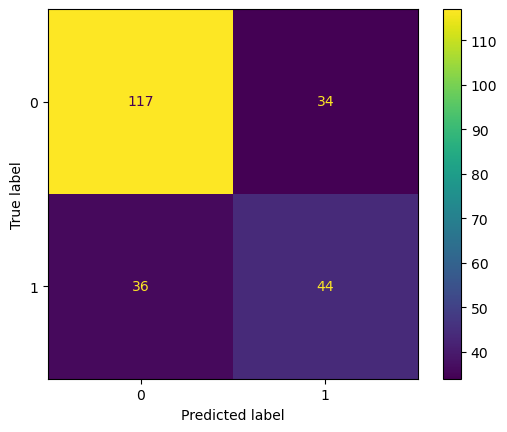

In [178]:
# Macierz błędów dla danych po redukcji wymiarowości
cm = confusion_matrix(y_test, y_pred_test_pca, labels=rf_class.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_class.classes_)
disp.plot()
plt.grid(False)
plt.show()

## Podsumowanie

In [169]:
print('Porównanie wydajności modelu Random Forest na danych wystandaryzowanych i po analizie głównych składowych PCA.\n')
print('Wydajność modelu Random Forest na danych wystandaryzowanych:')
print(classification_report(y_test, y_pred_test))
print('\n')    
print('Wydajność modelu Random Forest na danych po redukcji wymiarowości PCA :')
print(classification_report(y_test, y_pred_test_pca))

Porównanie wydajności modelu Random Forest na danych wystandaryzowanych i po anlizie głównych składowych PCA.

Wydajność modelu Random Forest na danych wystandaryzowanych:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.68      0.65      0.66        80

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



Wydajność modelu Random Forest na danych po redukcji wymiarowości PCA :
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       151
           1       0.56      0.55      0.56        80

    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231



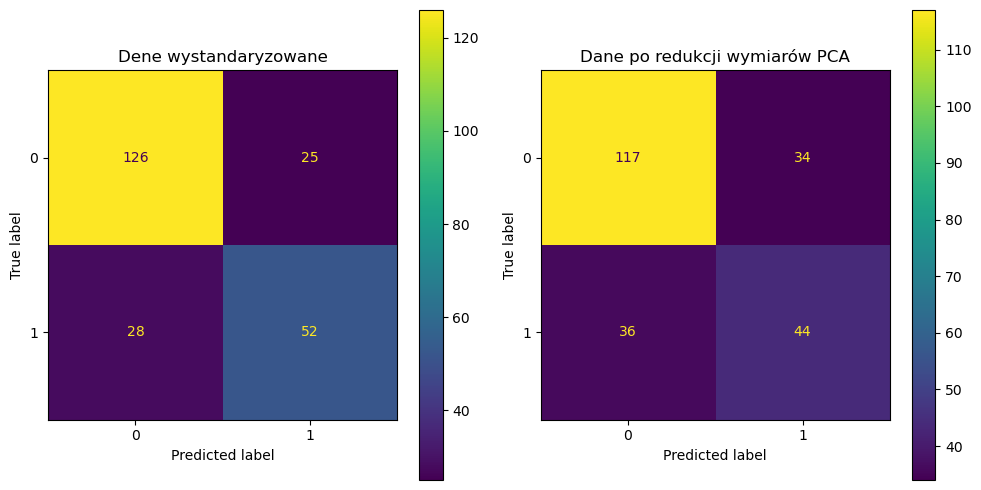

In [180]:
# Macierz błędów dla danch wystandaryzowanych
cm1 = confusion_matrix(y_test, y_pred_test, labels=rf_class.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=rf_class.classes_)

# Macierz błędów dla danych po redukcji wymiarów PCA
cm2 = confusion_matrix(y_test, y_pred_test_pca, labels=rf_class.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf_class.classes_)

# Tworzenie dwóch wykresów obok siebie
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Wykres 1
disp1.plot(ax=axs[0])
axs[0].set_title('Dene wystandaryzowane')
axs[0].grid(False)

# Wykres 2
disp2.plot(ax=axs[1])
axs[1].set_title('Dane po redukcji wymiarów PCA')
axs[1].grid(False)

plt.tight_layout()
plt.show()

Zadanie nr 2 25pkt. 

Poniżej podany jest zestaw danych (heart.csv). Zawiera on brakujące wartości. Twoim zadaniem jest przygotować ten zestaw danych do obróbki a następnie wytrenować klasyfikator przewidujący choroby serca dobierając ilość kroków oraz learning rate.

Wartością docelową jest num

Twoim celem jest odrzucenie zmiennych charakteryzujących się dużą ilością wartości brakujących oraz uzupełnienie pozostałych kolumn. Użyj do tego na przykład funkcji pd.DataFrame.isna, pd.DataFrame.sum oraz metody pd.Series.fillna.

Użyj metody xgb.cv do ustalenia przebiegu treningu. Postaraj się dobrać takie wartości ilości kroków oraz learning rate aby uniknąć przeuczenia (overfitu) w końcowym modelu. Zacznij od learning rate 0.01. Kiedy klasyfikator zostanie przetrenowany, użyj wykresu błędu w zależności od ilości kroków aby wyznaczyć przybliżoną optymalną ilość drzew dla danego modelu i wytrenuj ostateczny model.

Dodatkowe info: xgb obsługuje brakujące wartości przez parametr missing. Możesz (nie musisz) użyć tego zamiast interpolacji brakujących wartości.

In [3]:
df_heart = pd.read_csv('heart.csv')
df_heart

age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0     28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1     29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2     29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3     30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4     31    0   2      100  219   0       1     150     0      0.0     ?  ?   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ... ..   
289   52    1   4      160  331   0       0      94     1      2.5     ?  ?   
290   54    0   3      130  294   0       1     100     1      0.0     2  ?   
291   56    1   4      155  342   1       0     150     1      3.0     2  ?   
292   58    0   2      180  393   0       0     110     1      1.0     2  ?   
293   65    1   4      130  275   0       1     115     1      1.0     2  ?   

    thal  num         
0      ?           0  
1      ?           0  
2      ?           0  
3      6           0  
4      ?           0  
..   ...         ...  
289    ?           1  
290    ?           1  
291    ?           1  
292    7           1  
293    ?           1  

[294 rows x 14 columns]

In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [5]:
# Zamiana wszystkich wystąpień znaku '?' na wartości NaN  
df_heart = df_heart.replace('?',np.nan)

In [6]:
df_heart

age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope   ca  \
0     28    1   2      130  132   0       2     185     0      0.0   NaN  NaN   
1     29    1   2      120  243   0       0     160     0      0.0   NaN  NaN   
2     29    1   2      140  NaN   0       0     170     0      0.0   NaN  NaN   
3     30    0   1      170  237   0       1     170     0      0.0   NaN  NaN   
4     31    0   2      100  219   0       1     150     0      0.0   NaN  NaN   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ...  ...   
289   52    1   4      160  331   0       0      94     1      2.5   NaN  NaN   
290   54    0   3      130  294   0       1     100     1      0.0     2  NaN   
291   56    1   4      155  342   1       0     150     1      3.0     2  NaN   
292   58    0   2      180  393   0       0     110     1      1.0     2  NaN   
293   65    1   4      130  275   0       1     115     1      1.0     2  NaN   

    thal  num         
0    NaN           0  
1    NaN           0  
2    NaN           0  
3      6           0  
4    NaN           0  
..   ...         ...  
289  NaN           1  
290  NaN           1  
291  NaN           1  
292    7           1  
293  NaN           1  

[294 rows x 14 columns]

In [7]:
# Suma wszystki NaN w ramce danych
df_heart.isna().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [8]:
# Usunięcie kolumn, w których najwięcej wartości NaN występuje
df_heart= df_heart.drop(['slope', 'ca', 'thal'], axis=1)


In [9]:
df_heart

age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
0     28    1   2      130  132   0       2     185     0      0.0           0
1     29    1   2      120  243   0       0     160     0      0.0           0
2     29    1   2      140  NaN   0       0     170     0      0.0           0
3     30    0   1      170  237   0       1     170     0      0.0           0
4     31    0   2      100  219   0       1     150     0      0.0           0
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...         ...
289   52    1   4      160  331   0       0      94     1      2.5           1
290   54    0   3      130  294   0       1     100     1      0.0           1
291   56    1   4      155  342   1       0     150     1      3.0           1
292   58    0   2      180  393   0       0     110     1      1.0           1
293   65    1   4      130  275   0       1     115     1      1.0           1

[294 rows x 11 columns]

In [10]:
#  kolumny jak chol - chorestelor surowiczy, fbs - cukier we krwi, restecg - wyniki kartografii  w spoczynku (wartości 0, 1, 2), thalach - maksymalne osiągnięte tętno,
# exang - angina wywołana wysiłkiem (wartości 0, 1), będą w pózniejszych krokach zamienione z typu object na typ int64, aby uzyskać cechy numeryczne dla modelu
df_heart.isna().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

In [11]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num       '],
      dtype='object')

In [12]:
# Zmiana nazwy kolumny 
df_heart.rename(columns={'num       ': 'num'}, inplace=True)

In [13]:
# Sprawdzenie czy ramce danych, istnieje przynajmniej jedna komórka, która ma wartosć -1
df_heart.isin([-1]).any().any()

False

In [14]:
# Wypełnienie każdej brakującej wartości w każdej kolumnie wartością -1, aby w kolejnym kroku zmienić typ danych z object na int64 
for column in df_heart.columns:
        df_heart[column] = df_heart[column].fillna(-1)

In [15]:
# Zmiana każdej kolumny typu object na liczbowy
for column in df_heart.columns:
    if df_heart[column].dtype =='object': 
        df_heart[column]= df_heart[column].astype('int64')

In [31]:
df_heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  num
0     28    1   2       130   132    0        2      185      0      0.0    0
1     29    1   2       120   243    0        0      160      0      0.0    0
2     29    1   2       140    -1    0        0      170      0      0.0    0
3     30    0   1       170   237    0        1      170      0      0.0    0
4     31    0   2       100   219    0        1      150      0      0.0    0
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...  ...
289   52    1   4       160   331    0        0       94      1      2.5    1
290   54    0   3       130   294    0        1      100      1      0.0    1
291   56    1   4       155   342    1        0      150      1      3.0    1
292   58    0   2       180   393    0        0      110      1      1.0    1
293   65    1   4       130   275    0        1      115      1      1.0    1

[294 rows x 11 columns]

In [17]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    int64  
 4   chol      294 non-null    int64  
 5   fbs       294 non-null    int64  
 6   restecg   294 non-null    int64  
 7   thalach   294 non-null    int64  
 8   exang     294 non-null    int64  
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 25.4 KB


In [18]:
# Wartość wyjaśniająca
X = df_heart.drop(['num'], axis=1)

In [19]:
# Wartość wyjaśniana
y = df_heart['num']

In [20]:
# Utworzenie macierzy DMatrix, wraz z usunięciem wartości -1, której wcześniej użyliśmy aby zamienić wartości NaN na -1, aby ostatecznie zamienić typ danych z object na int64,
# teraz wartość -1 nie jest już nam potrzebna
clf_heart = xgb.DMatrix(data=X, label=y, feature_names=X.columns.tolist(), missing=-1)

In [21]:
ix_train, ix_test = train_test_split(range(clf_heart.num_row()),test_size=0.3,random_state=42) # za pomocą range(clf_heart.num_row() tworzymy sekwecnję liczb od zera do liczby
# wierszy zawartej w macierzy i wykorzystać tę sekwencję do podziału macierzy

clf_heart_train = clf_heart.slice(ix_train) # cechy traningowe w formie indeksów macierzy DMatrix
clf_heart_test = clf_heart.slice(ix_test)   # cechy testowe w formie indeksów macierzy DMatrix

In [48]:
# Parametry modelu
parametry = {"objective" : "reg:logistic",
             "learning_rate" : 0.3,
             "gamma" : 1 ,
             "max_depth" : 3, 
             "max_leaves":5}

In [49]:
# Wykonanie walidacji krzyżowej dla liczby etapów (20) boostingu określonej przez parametr num_boost_round. Zostały tutaj zastasowana metryka error (błąd klasyfikacji - 
# czyli stosunek źle sklasyfikowanych próbek do całkowitej liczby próbek) oraz pole pod krzywą auc. Została także trzykrotna walidacja krzyżowa (liczba foldów =3) 
cls_heart_xgb_cv = xgb.cv(params=parametry,dtrain=clf_heart_train,num_boost_round=20,nfold=3,metrics=['error', 'auc'])
cls_heart_xgb_cv

train-error-mean  train-error-std  train-auc-mean  train-auc-std  \
0           0.231519         0.085268        0.892793       0.026264   
1           0.129204         0.020611        0.914720       0.008123   
2           0.129204         0.020611        0.936290       0.015575   
3           0.129204         0.020611        0.940960       0.011443   
4           0.117021         0.017595        0.948299       0.010177   
5           0.124338         0.015421        0.951342       0.013247   
6           0.126771         0.017873        0.956940       0.010460   
7           0.104838         0.012112        0.959300       0.009486   
8           0.097538         0.013614        0.965768       0.008726   
9           0.102404         0.015571        0.969980       0.008290   
10          0.087806         0.017882        0.971470       0.006662   
11          0.082886         0.019016        0.976149       0.006053   
12          0.078038         0.006759        0.976868       0.006634   
13          0.075605         0.003322        0.976718       0.006566   
14          0.073154         0.005764        0.977180       0.007213   
15          0.073154         0.005764        0.977180       0.007213   
16          0.073154         0.005764        0.977180       0.007213   
17          0.073154         0.005764        0.977180       0.007213   
18          0.073154         0.005764        0.977180       0.007213   
19          0.073154         0.005764        0.977180       0.007213   

    test-error-mean  test-error-std  test-auc-mean  test-auc-std  
0          0.278275        0.118692       0.800984      0.041349  
1          0.234157        0.048056       0.833346      0.070957  
2          0.238988        0.048313       0.855247      0.066542  
3          0.214479        0.058552       0.861129      0.044336  
4          0.219381        0.022552       0.857737      0.036657  
5          0.229255        0.030076       0.861862      0.042559  
6          0.214550        0.049569       0.860821      0.045408  
7          0.209648        0.044871       0.863181      0.039686  
8          0.219452        0.020042       0.855216      0.032477  
9          0.214550        0.038050       0.862673      0.038118  
10         0.204746        0.030740       0.860105      0.032586  
11         0.214479        0.028864       0.863516      0.032022  
12         0.204817        0.020086       0.860183      0.028637  
13         0.209648        0.023909       0.865924      0.035799  
14         0.204817        0.020086       0.867394      0.034120  
15         0.204817        0.020086       0.867394      0.034120  
16         0.204817        0.020086       0.867394      0.034120  
17         0.204817        0.020086       0.867394      0.034120  
18         0.204817        0.020086       0.867394      0.034120  
19         0.204817        0.020086       0.867394      0.034120

In [37]:
# Na podstawie powyższego wyniku można zauważyć, że przy 14 etapach boostingu błąd `error` i 'auc' przestają stałe.
# Kolejnym etapem jest wytrenowanie ostatecznego modelu w oparciu o powyższe wyniki.
model_clf_heart_xgb_cv = xgb.train(params=parametry, dtrain=clf_heart_train, num_boost_round=14)

In [38]:
# Uzyskanie przewidywań modelu na danych treningowych
y_pred_xgb_cv_model_train = model_clf_heart_xgb_cv.predict(clf_heart_train)

In [39]:
# W przypadku celu "objective" : "reg:logistic" zwracana jest jednowymiarowa tablica (wektor) liczb zmiennoprzecinkowych przynależności do klasy 1.
# Każda wartość w tym wektorze reprezentuje przewidywane prawdopodobieństwo dla odpowiadającego wiersza danych.
y_pred_xgb_cv_model_train 

array([0.36171746, 0.45213583, 0.06094558, 0.15663077, 0.3978579 ,
       0.15743887, 0.9668552 , 0.9589226 , 0.12944585, 0.06447022,
       0.06447022, 0.50491786, 0.09135344, 0.46211454, 0.8345883 ,
       0.9492133 , 0.50491786, 0.15663077, 0.45213583, 0.12944585,
       0.33490172, 0.06397003, 0.10430691, 0.75088704, 0.06397003,
       0.4748942 , 0.10395648, 0.2682179 , 0.45213583, 0.05294321,
       0.9668552 , 0.9589226 , 0.44443747, 0.45213583, 0.7354302 ,
       0.9589226 , 0.18504183, 0.5322704 , 0.06447022, 0.06447022,
       0.04989703, 0.68987626, 0.06397003, 0.63001204, 0.06447022,
       0.9589226 , 0.79005903, 0.09135344, 0.07735028, 0.15663077,
       0.9668552 , 0.25106806, 0.57634056, 0.05790933, 0.07847911,
       0.45213583, 0.05294321, 0.63045394, 0.06634039, 0.12593812,
       0.10395648, 0.50491786, 0.12593812, 0.06447022, 0.0711657 ,
       0.26179418, 0.09135344, 0.7354302 , 0.07735028, 0.45213583,
       0.3427079 , 0.9492133 , 0.8574003 , 0.09135344, 0.73018

In [40]:
# Zastosowano standardowy próg odcięcia na powyższym wektorze 0,5.
y_pred_xgb_cv_train = (y_pred_xgb_cv_model_train>=0.5).astype(int)
y_pred_xgb_cv_train

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0])

In [41]:
# Dokładność klasyfikacji dla danych treningowych
accuracy_score(clf_heart_train.get_label(), y_pred_xgb_cv_train)

0.8780487804878049

In [42]:
# Uzyskanie przewidywań modelu na danych testowych
y_pred_xgb_cv_model = model_clf_heart_xgb_cv.predict(clf_heart_test)

In [43]:
# Prawdopodobieństwa przynależności do klasy 1 dla danych testowych
y_pred_xgb_cv_model

array([0.06447022, 0.04142131, 0.06397003, 0.64522696, 0.8574003 ,
       0.14211576, 0.33490172, 0.553711  , 0.05069324, 0.15663077,
       0.8560386 , 0.04142131, 0.45213583, 0.86555654, 0.04142131,
       0.38609803, 0.15114565, 0.7354302 , 0.15663077, 0.05069324,
       0.9589226 , 0.9668552 , 0.39873266, 0.06447022, 0.9589226 ,
       0.32029152, 0.04142131, 0.63045394, 0.33490172, 0.23890641,
       0.8279337 , 0.53816575, 0.9668552 , 0.83991504, 0.07060018,
       0.03188067, 0.08229741, 0.9589226 , 0.21672755, 0.93897855,
       0.45213583, 0.9589226 , 0.45213583, 0.10178319, 0.9725929 ,
       0.10897868, 0.8279987 , 0.45213583, 0.12580796, 0.22687584,
       0.8574003 , 0.15663077, 0.10178319, 0.45213583, 0.10430691,
       0.45213583, 0.23018318, 0.10430691, 0.8279337 , 0.15663077,
       0.10763813, 0.10178319, 0.07847911, 0.9725929 , 0.57634056,
       0.9589226 , 0.06447022, 0.08229741, 0.0711657 , 0.28435734,
       0.12944585, 0.8540914 , 0.45213583, 0.9267336 , 0.03188

In [44]:
# Zastosowano standardowy próg odcięcia 0,5 dla danych testowych
y_pred_xgb_cv = (y_pred_xgb_cv_model>=0.5).astype(int)
y_pred_xgb_cv

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0])

In [45]:
# Dokładność klasyfikacji dla danych testowych
accuracy_score(clf_heart_test.get_label(), y_pred_xgb_cv)

0.797752808988764

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        61
         1.0       0.69      0.71      0.70        28

    accuracy                           0.81        89
   macro avg       0.78      0.78      0.78        89
weighted avg       0.81      0.81      0.81        89



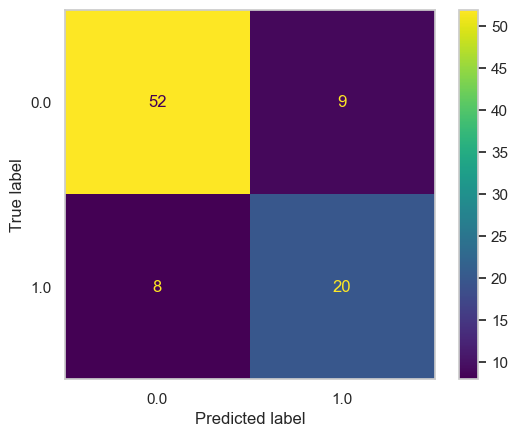

In [187]:
# Następnie pozostaje diagnostyka modelu.
(clf_heart_test.get_label(), y_pred_xgb_cv)
print(classification_report(clf_heart_test.get_label(), y_pred_xgb_cv))
plt.grid(False)
plt.show()

Zadanie nr 3 25pkt.

Na podstawie danych zawartych w zbiorze https://www.kaggle.com/mlg-ulb/creditcardfraud dotyczącym wyłudzeń transakcji kartowych, stwórz model SVM oraz lasu losowego, który szacować będzie ryzyko wyłudzenia.

W zadaniu muszą pojawić się co najmniej takie punkty jak:

Podział zbioru na treningowy i testowy Ocena jakości każdego z modeli oraz wybór lepszego z nich. Wybór poziomu cut-off, który pozwoli na jak najlepsze wykrywanie fraud'ów (Zastanów się, co jest dla Ciebie gorszą sytuacją błędne przypisanie frauda zwykłej transakcji czy uznanie zwykłej transakcji za fradu). Uargumnetuj swój wybór. Zadania dodatkowe (ekstra punkty!):

Wydziel również zbiór walidacyjny, na którym sprawdzisz czy wybrany, ostateczny model zachowuje jakość. Fraud jest zdarzeniem rzadkim. Istnieją metody, które pozwalają na lepsze rozpoznanie tego typu zjawisk, mogą to być na przykład oversampling lub undersampling. Użyj jednej z tych metod. Uwagi:

Zbiór cech jest wynikiem analizy głównych składowych (ang. PCA) - metody zmniejszającej wymiarowość (liczbę cech objaśniających). Możecie znaleźć wiele ciekawych materiałów na ten temat w internecie. W powyższym zadaniu nie ma jednak konieczności poznawania szczegółów tej metody. Dla celów naukowych, możecie sprawdzić średnią i odchylenie standardowe każdej ze zmiennych.

In [3]:
df_creditcart = pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns', None)
df_creditcart.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   
5  0.260314 -0.568671 -0.371407  1.341262  0.359894 -0.358091 -0.137134   
6  0.081213  0.464960 -0.099254 -1.416907 -0.153826 -0.751063  0.167372   
7 -3.807864  0.615375  1.249376 -0.619468  0.291474  1.757964 -1.323865   
8  0.851084 -0.392048 -0.410430 -0.705117 -0.110452 -0.286254  0.074355   
9  0.069539 -0.736727 -0.366846  1.017614  0.836390  1.006844 -0.443523   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   
5  0.517617  0.401726 -0.058133  0.068653 -0.033194  0.084968 -0.208254   
6  0.050144 -0.443587  0.002821 -0.611987 -0.045575 -0.219633 -0.167716   
7  0.686133 -0.076127 -1.222127 -0.358222  0.324505 -0.156742  1.943465   
8 -0.328783 -0.210077 -0.499768  0.118765  0.570328  0.052736 -0.073425   
9  0.150219  0.739453 -0.540980  0.476677  0.451773  0.203711 -0.246914   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
5 -0.559825 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080   
6 -0.270710 -0.154104 -0.780055  0.750137 -0.257237  0.034507  0.005168   
7 -1.015455  0.057504 -0.649709 -0.415267 -0.051634 -1.206921 -1.085339   
8 -0.268092 -0.204233  1.011592  0.373205 -0.384157  0.011747  0.142404   
9 -0.633753 -0.120794 -0.385050 -0.069733  0.094199  0.246219  0.083076   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0  
5    3.67      0  
6    4.99      0  
7   40.80      0  
8   93.20      0  
9    3.68      0

In [4]:
df_creditcart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df_creditcart.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df_creditcart.duplicated().sum()

1081

In [7]:
df_creditcart.drop_duplicates(inplace=True)

In [8]:
df_creditcart.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

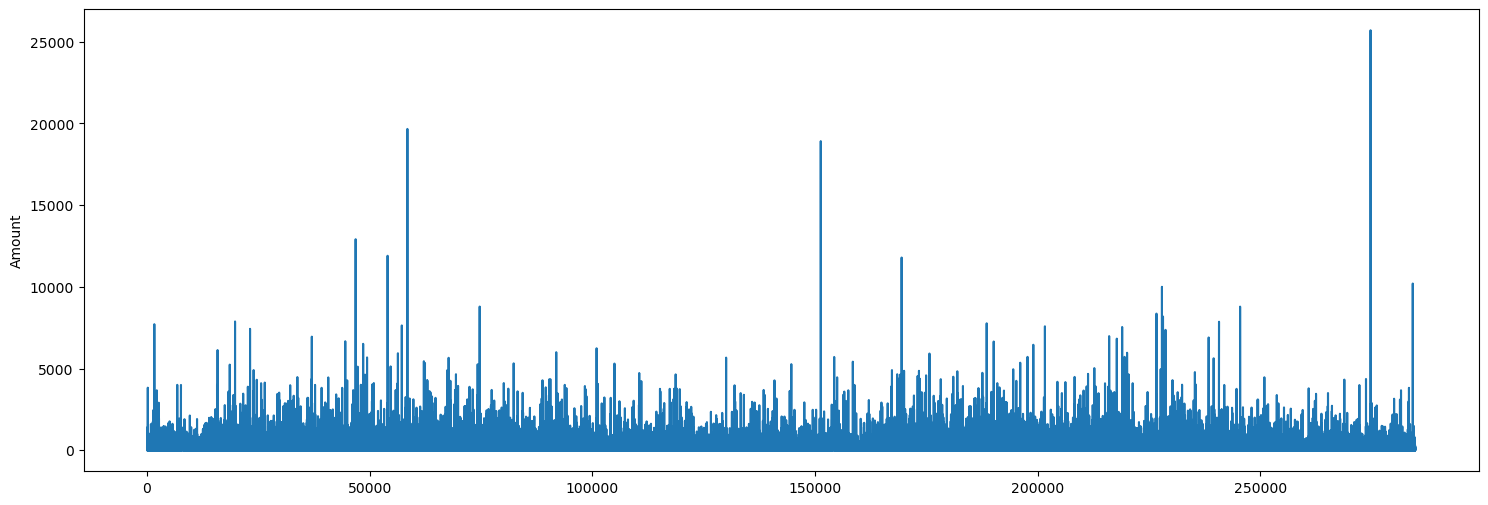

In [9]:
# Duża fluktuacja w kwotach 
plt.figure(figsize=(18,6))
sns.lineplot(df_creditcart['Amount'])
plt.show()

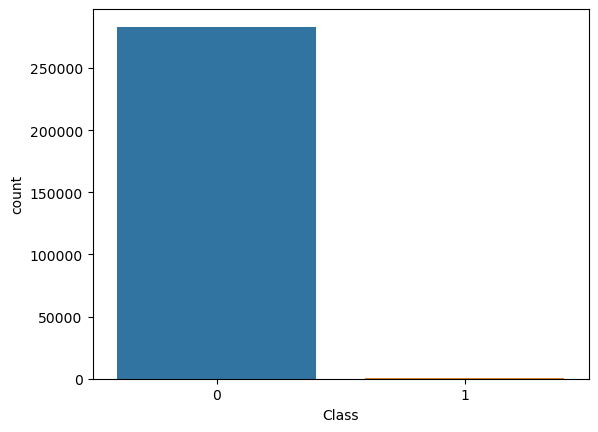

In [26]:
# Mocno niezbalansowane dane w kolumnie Class
sns.countplot(x=df_creditcart['Class'])
plt.show()

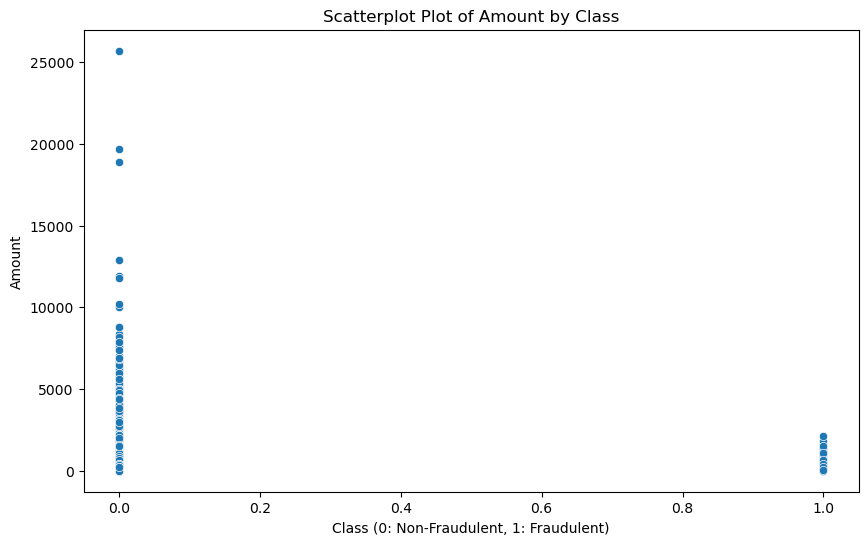

In [27]:
# Kwota w przypadku fraudów była mniejsza niż w przypadku transakcji nie będącymi freudami. Kwota w przypadku transakcji nie będącymi fraudami wynosi około 25 tysięcy. 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_creditcart, x='Class', y='Amount')
plt.title('Scatterplot Plot of Amount by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Amount')
plt.show()

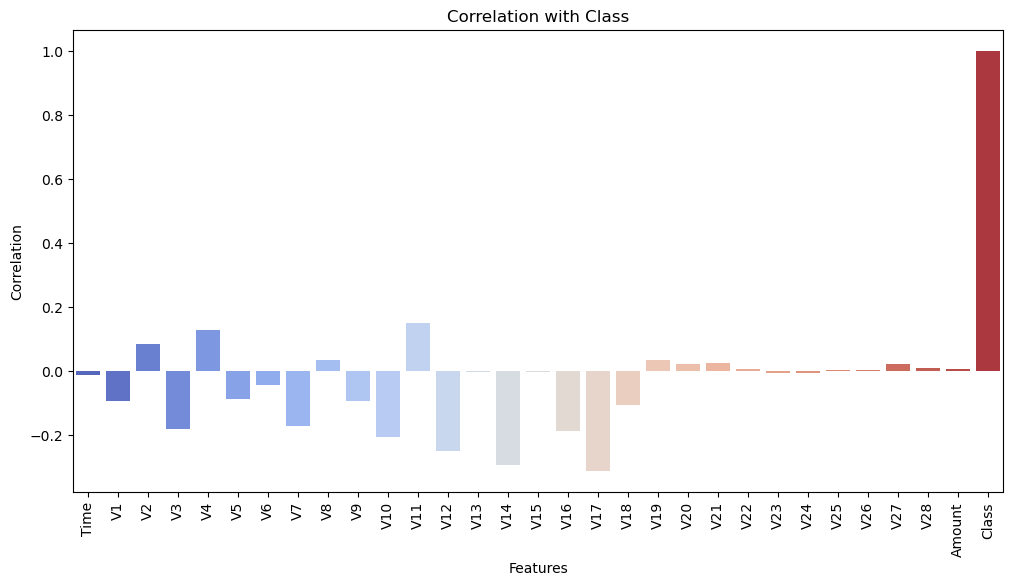

In [9]:
# Oblicznie korelacji między cehami a klasą
correlation_matrix = df_creditcart.corr()

# Wykres słupkowy na podstawie macierzy korelacji
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_matrix.index, y =correlation_matrix['Class'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [10]:
# splitting
X = df_creditcart.drop(['Class'], axis=1)
y = df_creditcart['Class']

In [11]:
# undersampling - został zastasowany undersampling, ponieważ model na oversamplingu zbyt długo się uczy, szczególnie przy SVM (dane pierwotne zawierają dużo próbek)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [12]:
# oversampling
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X, y)

In [13]:
# analizy rozmiaru zestawu danych przed przeprowadzeniem operacji resamplingu
from collections import Counter
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 283253, 1: 473})


In [14]:
# analizy rozmiaru zestawu danych po przeprowadzeniu operacji resamplingu i wyświetlenie informacji na temat równoważenia klas w wyniku tego procesu
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 473, 1: 473})


In [15]:
print(X_res.shape)
print(y_res.shape)

(946, 30)
(946,)


In [16]:
# scaling
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_res)

In [17]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_res, test_size=0.3, random_state=42)

In [18]:
# Funkcja acc_report jest używana do generowania raportu wydajności modelu klasyfikacji 
def acc_report(actual, predicted):
    acc_score = accuracy_score(actual, predicted) 
    class_report = classification_report(actual, predicted)
    print('the accuracy of this model is', acc_score)
    print(class_report)
 

### Random Forest Classifier

In [51]:
# Random Forest Classifier, przeszukanie siatki paramerów
rf_cls = RandomForestClassifier()
parameters_rf_cls = {
    'n_estimators': [10, 30, 50, 100],                # Liczba drzew w lesie
    'max_depth': [None, 3, 5, 8, 10, 20, 30],         # Maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],                  # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 5, 10, 20],               # Minimalna liczba próbek wymagana w liściu
}

rf_cls = GridSearchCV(rf_cls, parameters_rf_cls, cv=5)

In [52]:
rf_cls.fit(X_train, y_train)
y_pred_rf_cls_train = rf_cls.predict(X_train)
y_pred_rf_cls_test = rf_cls.predict(X_test)

In [53]:
# Najlepsze znalezione parametry
rf_cls.best_params_

{'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 10}

In [54]:
# Najlepszy estymator 
rf_cls.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=10)

In [55]:
acc_report(y_train, y_pred_rf_cls_train)
acc_report(y_test, y_pred_rf_cls_test)

the accuracy of this model is 0.9682779456193353
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       333
           1       0.99      0.94      0.97       329

    accuracy                           0.97       662
   macro avg       0.97      0.97      0.97       662
weighted avg       0.97      0.97      0.97       662

the accuracy of this model is 0.9401408450704225
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       140
           1       0.98      0.90      0.94       144

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



In [56]:
# Funkacja ROC Curve
from sklearn import metrics

def draw_roc(actual, probs):
    fpr, tpr, threshold = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show() 

In [57]:
# Zbiór traningowy
y_train_pred_rf_cls_proba = rf_cls.predict_proba(X_train)[:, 1]

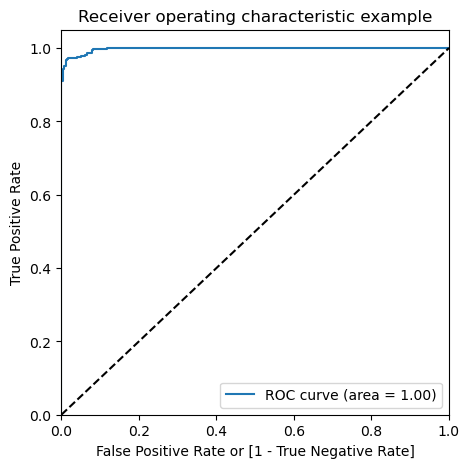

In [58]:
draw_roc(y_train, y_train_pred_rf_cls_proba)

In [59]:
# Zbiór testowy
y_test_pred_rf_cls_proba = rf_cls.predict_proba(X_test)[:, 1]

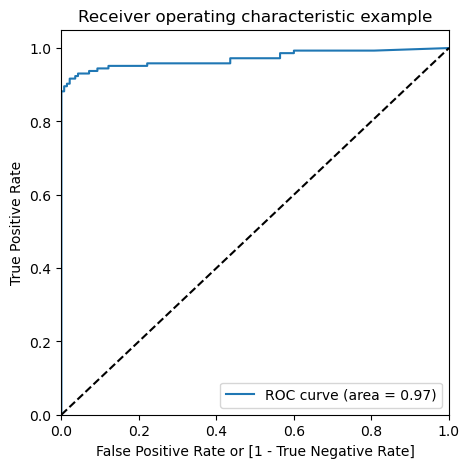

In [60]:
draw_roc(y_test, y_test_pred_rf_cls_proba)

In [61]:
df_creditcart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [62]:
# Wydzielenie zbioru walidacyjnego
validate_set = df_creditcart.sample(n=100000)
X_validate_set = validate_set.drop(['Class'], axis=1)
y_validate_set = validate_set['Class']

#undersampling zbioru walidacyjnego
X_res_validate_set, y_res_validate_set = rus.fit_resample(X_validate_set, y_validate_set)

In [63]:
# Scalowanie zbioru walidacyjnego
X_scaler_validate_set = scaler.fit_transform(X_res_validate_set)

In [64]:
# Wykonanie predykcji
y_pred_rf_cls_validate_set = rf_cls.predict(X_scaler_validate_set)
acc_report(y_res_validate_set, y_pred_rf_cls_validate_set)

the accuracy of this model is 0.928125
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       160
           1       0.97      0.89      0.93       160

    accuracy                           0.93       320
   macro avg       0.93      0.93      0.93       320
weighted avg       0.93      0.93      0.93       320



In [65]:
y_pred_rf_cls_proba_validate_set = rf_cls.predict_proba(X_scaler_validate_set)[:, 1]

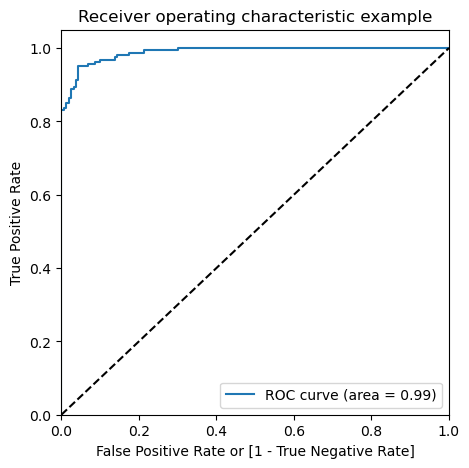

In [66]:
draw_roc(y_res_validate_set, y_pred_rf_cls_proba_validate_set)

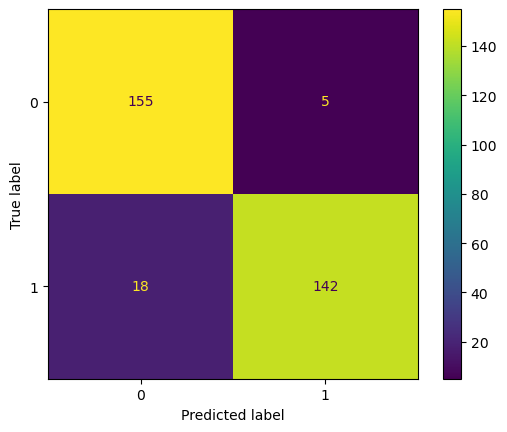

In [67]:
# Macierz błędów przy progu decyzyjnym (cut-off) 0.5 
ConfusionMatrixDisplay.from_predictions(y_res_validate_set, y_pred_rf_cls_validate_set)

In [68]:
# W sytuacji, gdzie fraudy zdarzają się bardzo rzadko, korzystne jest wybrać niższy próg (cut-off),
# który prowadzi do zwiększenia czułości modelu kosztem specyficzności, czyli model będzie bardziej skłonny do oznaczania transakcji jako potencjalnie fraudulencyjnych,
# co może prowadzić do fałszywych pozytywnych przypadków (błędne przypisanie frauda do zwykłych transakcji),
# ale jednocześnie zminimalizuje ryzyko niewykrycia rzeczywistych oszustw (fałszywy negatyw).
# Skutkuje to czasem dodatkowymi krokami weryfikacji klienta.
# Na powyższmym wykresie ConfusionMatrixDisplay mamy 18 freudów niewykrych (przewiduje 0, czyli FN), natomiast po obniżeniu progu do 0.3 zostało już niewykrytych 6 (wykres niżej), czyli
# więcej jak połowa, zwiększył się FP, ale na tych klientach można wykonąć dodatkowe kroki weryfikacyjne. 
thershold_setting=(y_pred_rf_cls_proba_validate_set>=0.3).astype(int)
thershold_setting

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

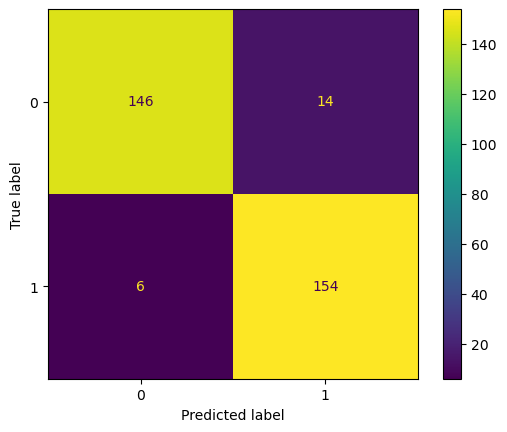

In [69]:
# Macierz błędów przy obniżonym progu decyzyjnym do 0.3
ConfusionMatrixDisplay.from_predictions(y_res_validate_set, thershold_setting)

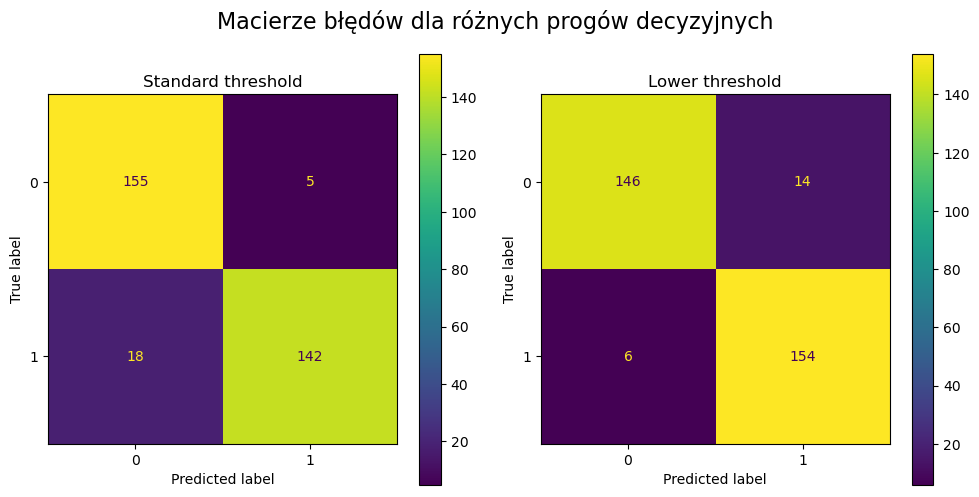

In [70]:
# Porównanie macierzy błędów dla róznuych progów decyzyjnych (teraz oba powyż wykresy na jednym wykresie)
# Macierz błędów dla progu decyzyjnego niezmienionego
cm3 = confusion_matrix(y_res_validate_set, y_pred_rf_cls_validate_set, labels=rf_cls.classes_)
standard_threshold = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=rf_cls.classes_)

# Macierz błędów dla progu decyzyjnego obniżonego
cm4 = confusion_matrix(y_res_validate_set, thershold_setting, labels=rf_cls.classes_)
lower_threshold = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=rf_cls.classes_)

# Tworzenie dwóch wykresów obok siebie
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Zwiększenie szerokości figury

# Wykres 1
standard_threshold.plot(ax=axs[0])
axs[0].set_title('Standard threshold')
axs[0].grid(False)

# Wykres 2
lower_threshold.plot(ax=axs[1])
axs[1].set_title('Lower threshold')
axs[1].grid(False)

suptitle = plt.suptitle('Macierze błędów dla różnych progów decyzyjnych')
suptitle.set_fontsize(16)

plt.tight_layout()
plt.show()

### Support Vector Classification

In [40]:
# Model SVM na danych po undersamplingu i standaryzacji (dla tych samych co dla Randomforest)
# Wybór parametrów meodelu
parameters = {
    'kernel': ['linear', 'rbf', 'sigmoid'],  # Przetestuj różne funkcje jądrowe
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Przetestuj różne wartości hiperparametru C
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],  # Przetestuj różne wartości parametru gamma dla jądra rbf
    'coef0': [0.0, 0.5, 1.0, 1.5, 2.0],  # Przetestuj różne wartości parametru jądra sigmoid
}
clf_svm = GridSearchCV(svm.SVC(), param_grid=parameters)

In [41]:
clf_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'coef0': [0.0, 0.5, 1.0, 1.5, 2.0],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [43]:
# Wybór najlepszego estymatora
clf_svm.best_params_

{'C': 10, 'coef0': 0.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [192]:
clf_svm.best_estimator_

SVC(C=10, gamma=0.01)

In [44]:
# Model SVM przy najlepszych parametrach
clf_svm = svm.SVC(kernel='rbf', gamma = 0.01, coef0= 0.0,
                  C=10, probability=True)

In [45]:
clf_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.01, probability=True)

In [46]:
# Predykcja dla danych uczący i testowych
y_pred_clf_svm_train = clf_svm.predict(X_train)
y_pred_clf_svm_test = clf_svm.predict(X_test)

In [47]:
acc_report(y_train, y_pred_clf_svm_train)
acc_report(y_test, y_pred_clf_svm_test)

the accuracy of this model is 0.9561933534743202
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       333
           1       0.99      0.92      0.95       329

    accuracy                           0.96       662
   macro avg       0.96      0.96      0.96       662
weighted avg       0.96      0.96      0.96       662

the accuracy of this model is 0.9507042253521126
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       140
           1       0.98      0.92      0.95       144

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284



In [48]:
# model SVM na danych z wydzielonego danych walidacyjnych (dane po undersamplingu oraz skalowaniu, X_scaler_validate_set, który był wyżej, w modelu Random Forest)
y_pred_clf_svm_validate_set = clf_svm.predict(X_scaler_validate_set)

In [49]:
acc_report(y_res_validate_set, y_pred_clf_svm_validate_set)

the accuracy of this model is 0.9666666666666667
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       165
           1       0.97      0.96      0.97       165

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [50]:
# Prawdopodobieństwo przewidywania klasy pozytuwnej, dla funkcji ROC
y_pred_clf_svm_proba_validate_set = clf_svm.predict_proba(X_scaler_validate_set)[:, 1]

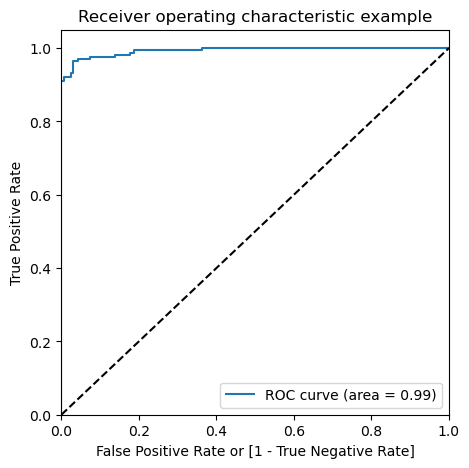

In [51]:
# Krzywa ROC dla modelu SVM dla danych wydzielonych
draw_roc(y_res_validate_set, y_pred_clf_svm_proba_validate_set)

In [52]:
print('Przy zadanych parametrach, dla modelu Random Forest na danych wydzielonych wydajność jest lepsza w porównaniu do modelu SVM.\n')
print('Wydajność modelu Random Forest:')
acc_report(y_res_validate_set, y_pred_rf_cls_validate_set)
print('\n')    
print('Wydajność modelu SVM:')
acc_report(y_res_validate_set, y_pred_clf_svm_validate_set)

Przy zadanych parametrach, dla modelu Random Forest na danych wydzielonych wydajność jest lepsza w porównaniu do modelu SVM.

Wydajność modelu Random Forest:
the accuracy of this model is 0.9606060606060606
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       165
           1       0.97      0.95      0.96       165

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



Wydajność modelu SVM:
the accuracy of this model is 0.9666666666666667
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       165
           1       0.97      0.96      0.97       165

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



Zadanie nr 4 25pkt

Na podstawie zbioru https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data dokonaj klasteryzacji różnych rodzajów noclegów oferowanych przez Airbnb. Proponowane zmienne do klasteryzacji:

latitude longitude Price minimum nights Number of reviews lub number of reviews per month Proszę o wybranie minimum 4 zmiennych. Klasteryzacja pozwoli nam na znalezienie obiektów położonych w podobnym miejscu i o zbliżonych cenach i warunkach. Należy wyznaczyć optymalną liczbę klastrów z graficznym objaśnieniem. Trzeba pamiętać o zachowaniu poprawności założeń (np. standaryzacja zmiennych).

In [ ]:
df_Airbnb =pd.read_csv('AB_NYC_2019.csv')
df_Airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
df_Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_Airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:

df_Airbnb = df_Airbnb.dropna()
df_Airbnb.isna().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df_Airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Wybranie pożądanych cech z ramki danych
df_Airbnb_features = df_Airbnb[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews']]
df_Airbnb_features

latitude  longitude  price  minimum_nights  number_of_reviews
0      40.64749  -73.97237    149               1                  9
1      40.75362  -73.98377    225               1                 45
3      40.68514  -73.95976     89               1                270
4      40.79851  -73.94399     80              10                  9
5      40.74767  -73.97500    200               3                 74
...         ...        ...    ...             ...                ...
48782  40.78099  -73.95366    129               1                  1
48790  40.75104  -73.81459     45               1                  1
48799  40.54179  -74.14275    235               1                  1
48805  40.80787  -73.92400    100               1                  2
48852  40.69805  -73.92801     30               1                  1

[38821 rows x 5 columns]

In [ ]:
# Usuwanie wartości odstających metodą z_scores
# Wszystkie obserwacje, które znajdują się więcej niż 2 standardowe odchylenia od średniej w dowolnej kolumnie, zostaną uznane za wartości odstające i usunięte z ramki danych.
z_scores = np.abs((df_Airbnb_features - np.mean(df_Airbnb_features)) / np.std(df_Airbnb_features))
threshold = 2 
df_Airbnb_features= df_Airbnb_features[(z_scores <= threshold).all(axis=1)]

c:\Users\sieli\anaconda3\envs\test_env\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
df_Airbnb_features.isna().sum()


latitude             0
longitude            0
price                0
minimum_nights       0
number_of_reviews    0
dtype: int64

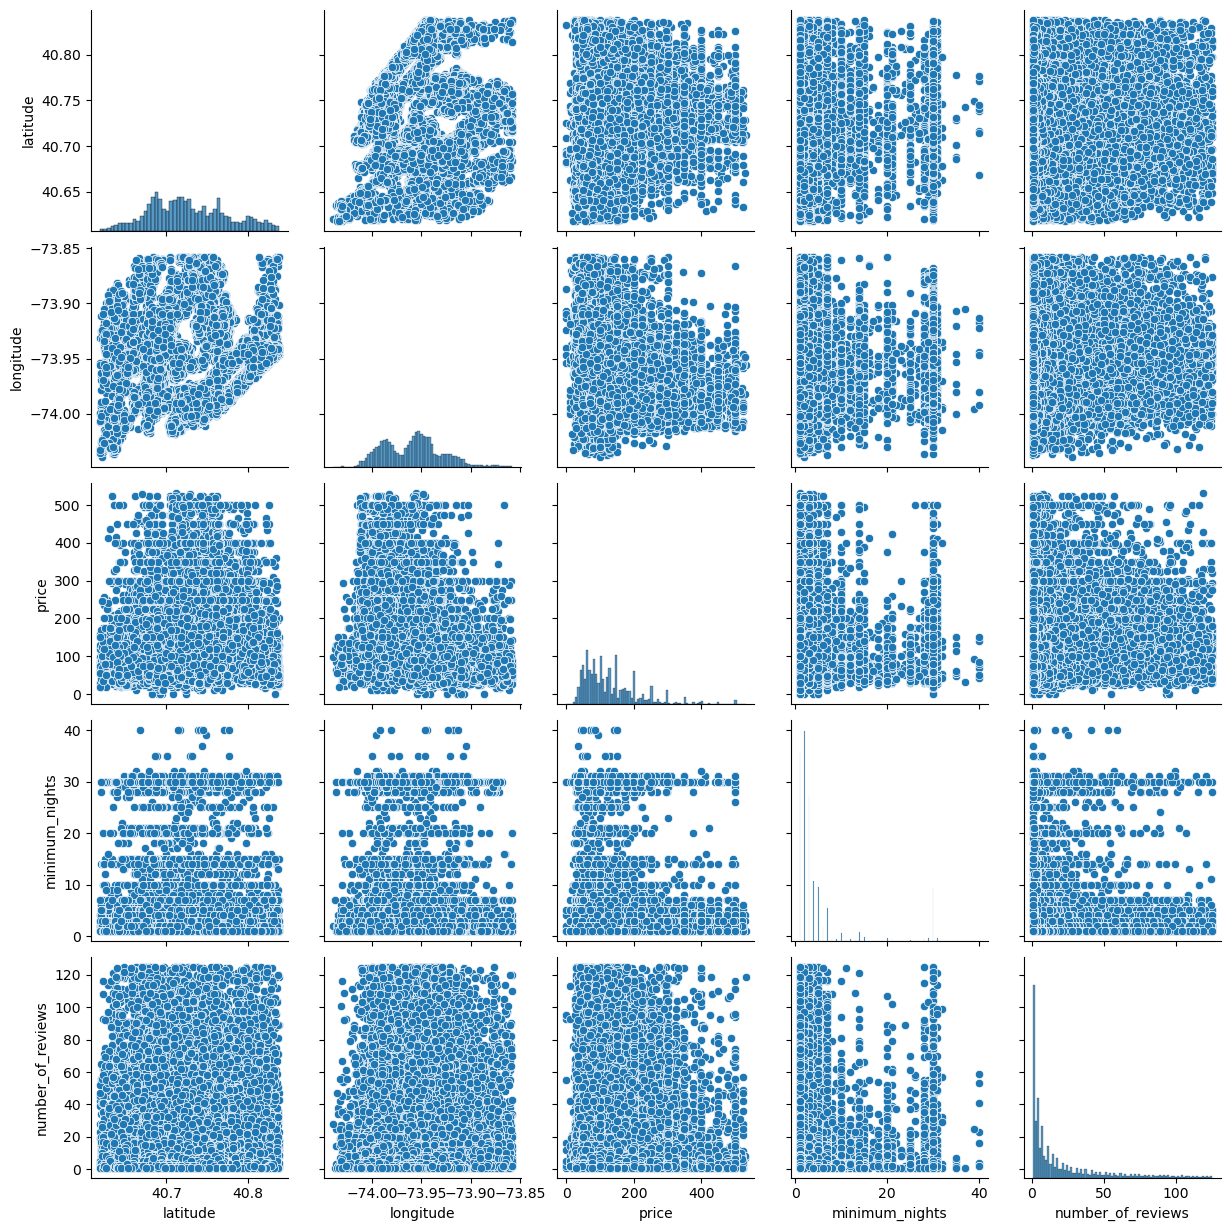

In [ ]:
# Tworzenie scatterplot dla wszystkich cech
sns.pairplot(df_Airbnb_features)

In [ ]:
# skalowanie cech 
scaler = StandardScaler()
scaled_df_Airbnb_features = scaler.fit_transform(df_Airbnb_features)
scaled_df_Airbnb_features

array([[-1.66817787, -0.47845885,  0.18323945, -0.55338248, -0.41832428],
       [ 0.56533583, -0.84963699,  1.05825644, -0.55338248,  0.92168176],
       [ 1.51004921,  0.44557937, -0.61118388,  0.60176393, -0.41832428],
       ...,
       [ 1.14133951,  0.13072914, -0.04702818, -0.55338248, -0.7161034 ],
       [ 1.7070311 ,  1.0964435 , -0.38091625, -0.55338248, -0.67888101],
       [-0.60413893,  0.96587996, -1.18685295, -0.55338248, -0.7161034 ]])

In [ ]:
# Wyznaczenie optymalnej liczby klastrów za pomocą indeksu Silhouette
silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df_Airbnb_features)
    silhouette = silhouette_score(scaled_df_Airbnb_features, cluster_labels)
    silhouette_scores.append(silhouette)

c:\Users\sieli\anaconda3\envs\test_env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\sieli\anaconda3\envs\test_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


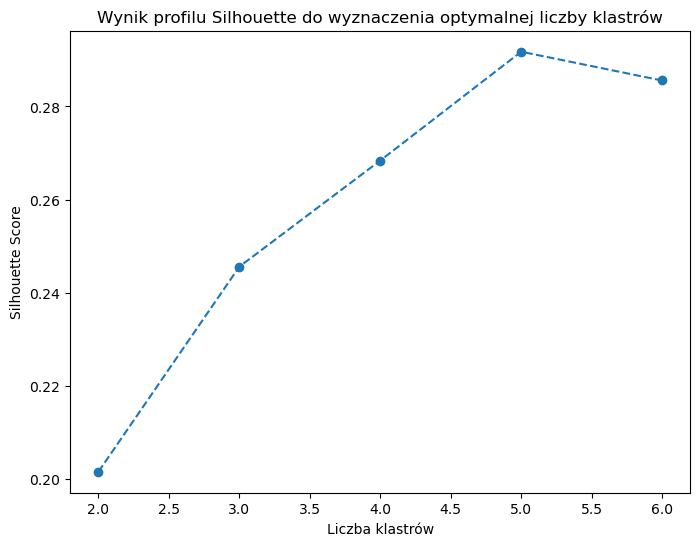

In [ ]:
# Wykres profilu Silhouette
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Wynik profilu Silhouette do wyznaczenia optymalnej liczby klastrów')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

Optymalna liczba klastrów: 5


In [ ]:

kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++',n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df_Airbnb_features)

In [ ]:
# Dodanie klastrów do cech wyskalowanych 
df_clasterization=pd.DataFrame(scaled_df_Airbnb_features, columns=df_Airbnb_features.columns)
df_clasterization['cluster'] = cluster_labels
df_clasterization

latitude  longitude     price  minimum_nights  number_of_reviews  \
0     -1.668178  -0.478459  0.183239       -0.553382          -0.418324   
1      0.565336  -0.849637  1.058256       -0.553382           0.921682   
2      1.510049   0.445579 -0.611184        0.601764          -0.418324   
3      0.440118  -0.564090  0.770422       -0.296683           2.001131   
4      1.578867  -0.311103 -0.622697       -0.425033           3.638916   
...         ...        ...       ...             ...                ...   
32551 -0.657593   0.591446 -1.014152       -0.553382          -0.678881   
32552 -0.179028  -1.058669  0.194753       -0.168334          -0.716103   
32553  1.141340   0.130729 -0.047028       -0.553382          -0.716103   
32554  1.707031   1.096444 -0.380916       -0.553382          -0.678881   
32555 -0.604139   0.965880 -1.186853       -0.553382          -0.716103   

       cluster  
0            3  
1            0  
2            1  
3            2  
4            2  
...        ...  
32551        3  
32552        0  
32553        1  
32554        1  
32555        3  

[32556 rows x 6 columns]

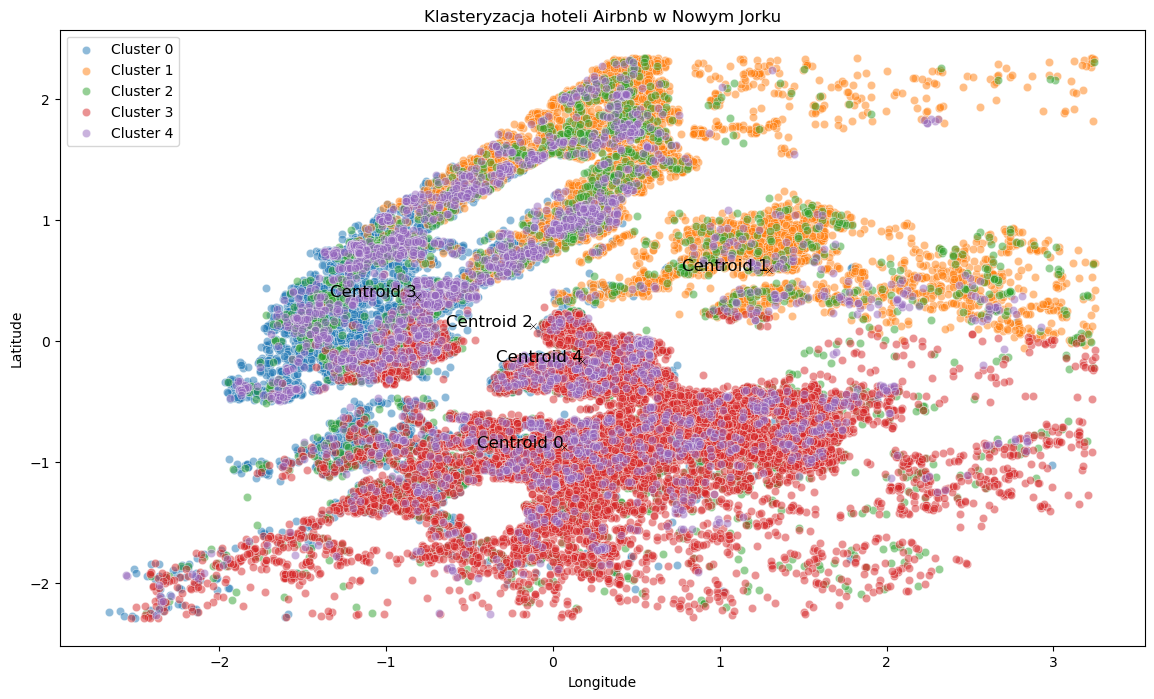

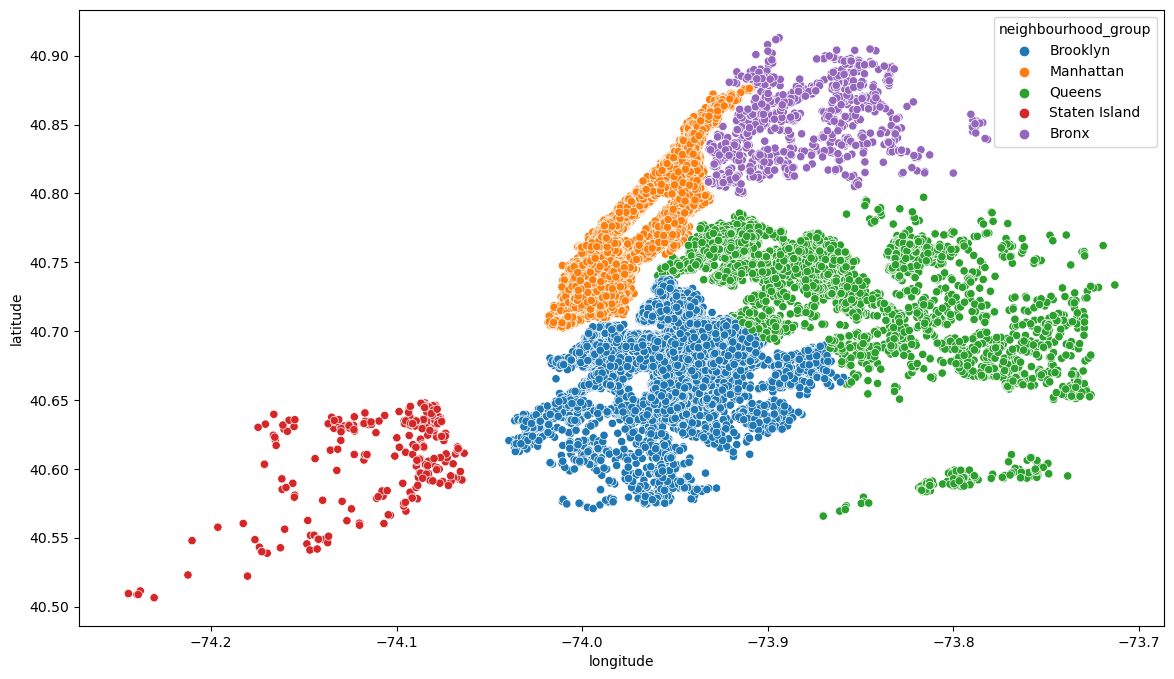

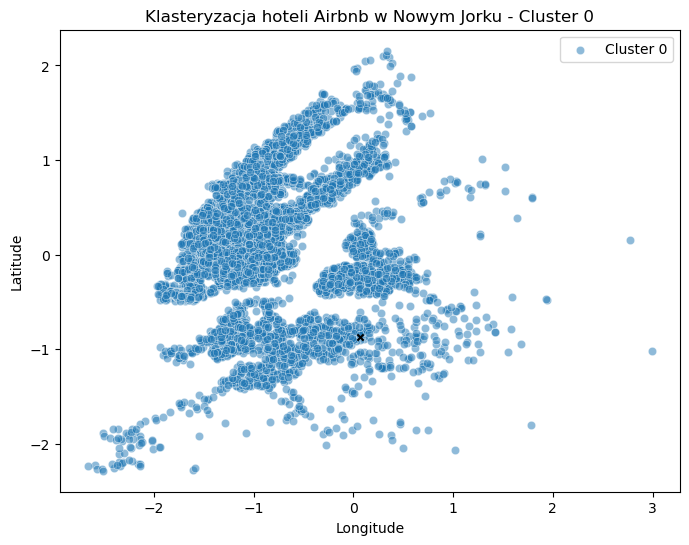

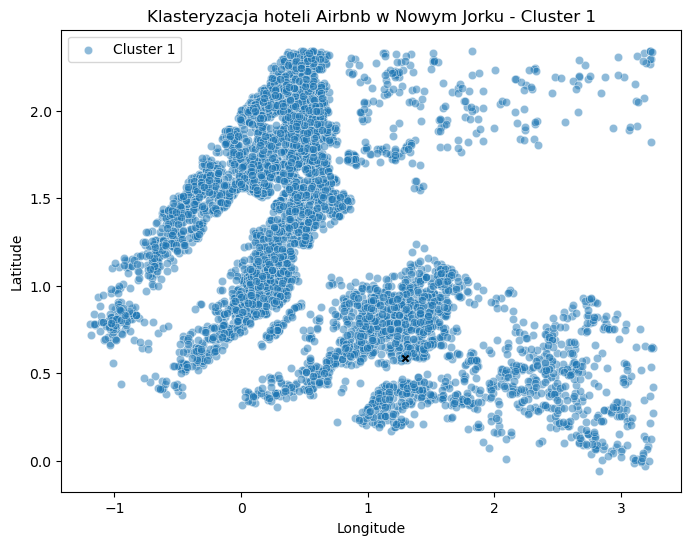

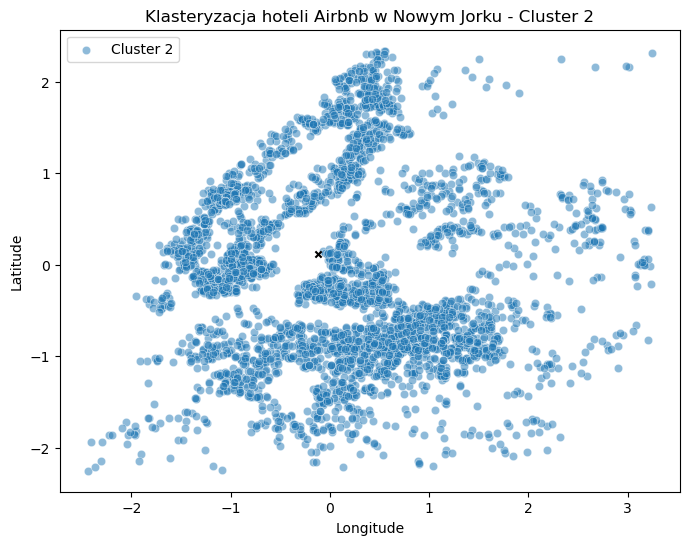

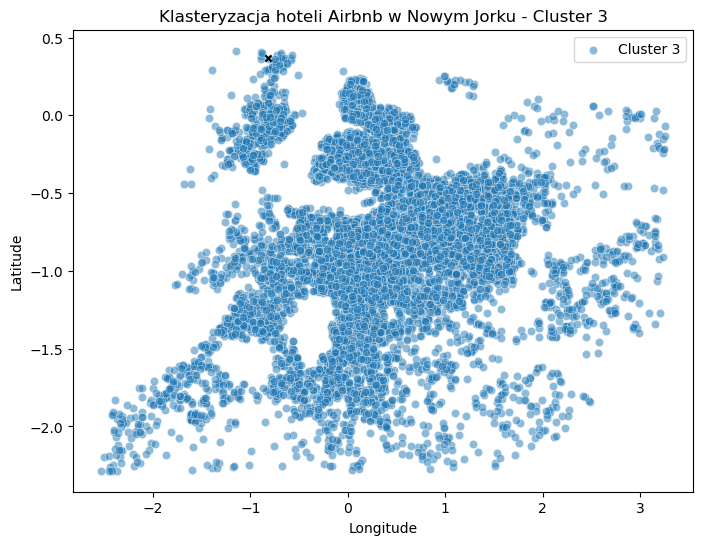

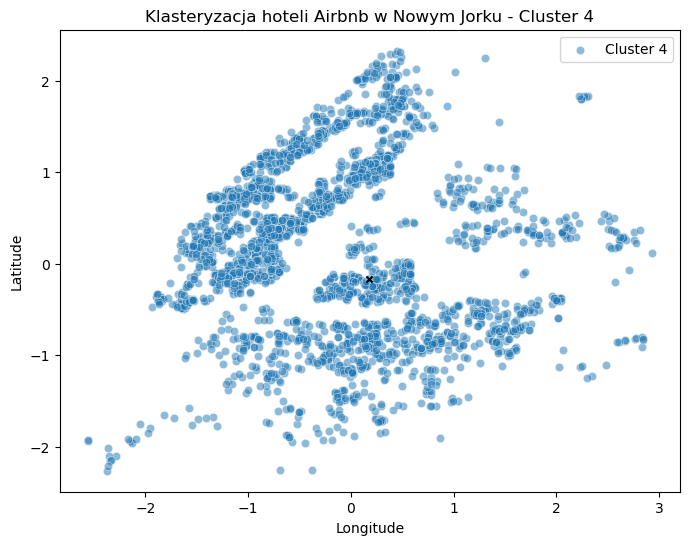

In [ ]:
# Wykresy
plt.figure(figsize=(14, 8))

# Rysowanie wszusty klastrów
for cluster in range(optimal_n_clusters):
    cluster_data = df_clasterization[df_clasterization['cluster'] == cluster]
    sns.scatterplot(x='longitude', y='latitude', data=cluster_data, label=f'Cluster {cluster}', alpha=0.5)

# Rysowanie centroidów
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color="black", marker='x', s=20)

# Przydzielenie nazw centroidom
for cluster, centroid in enumerate(kmeans.cluster_centers_):
    plt.text(centroid[0], centroid[1], f'Centroid {cluster}', fontsize=12, ha='right', va='baseline', color='black')

plt.title('Klasteryzacja hoteli Airbnb w Nowym Jorku')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Wykres dla dzielnic
title = 'Neighbourhood Group Location'
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df_Airbnb)
plt.show()

# osobne wykresy dla każdego klastra
for cluster in range(optimal_n_clusters):
    plt.figure(figsize=(8, 6))
    cluster_data = df_clasterization[df_clasterization['cluster'] == cluster]
    sns.scatterplot(x='longitude', y='latitude', data=cluster_data, label=f'Cluster {cluster}', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1], color="black", marker='x', s=20)
    plt.title(f'Klasteryzacja hoteli Airbnb w Nowym Jorku - Cluster {cluster}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

In [ ]:
# Dodanie klastrów do cech niewyskalowanych, aby wyliczyć średnie wartości dla każdego klastra
df_Airbnb_features = df_Airbnb_features.copy() 
df_Airbnb_features['cluster'] = cluster_labels
df_Airbnb_features

latitude  longitude  price  minimum_nights  number_of_reviews  cluster
0      40.64749  -73.97237    149               1                  9        3
1      40.75362  -73.98377    225               1                 45        0
4      40.79851  -73.94399     80              10                  9        1
5      40.74767  -73.97500    200               3                 74        2
8      40.80178  -73.96723     79               2                118        2
...         ...        ...    ...             ...                ...      ...
48701  40.69551  -73.93951     45               1                  2        3
48732  40.71825  -73.99019    150               4                  1        0
48782  40.78099  -73.95366    129               1                  1        1
48805  40.80787  -73.92400    100               1                  2        1
48852  40.69805  -73.92801     30               1                  1        3

[32556 rows x 6 columns]

In [ ]:
# Ramka danych z wartościmi średnimi dla każdego klastra (Najwyższa średnia cena jest na Manhattanie, co odpowiada klastrowi 0)
df_mean_values_cluster = df_Airbnb_features.groupby('cluster').mean()
df_mean_values_cluster

latitude  longitude       price  minimum_nights  number_of_reviews
cluster                                                                     
0        40.729848 -73.984504  217.622973        3.139018          11.953056
1        40.788361 -73.939438  100.132502        2.949305          14.265635
2        40.720922 -73.953922  124.995706        2.593935          82.170961
3        40.687958 -73.946420   86.493991        3.131817          11.645960
4        40.735192 -73.962784  132.129325       29.017476          10.830479